In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving yulu_df.csv to yulu_df.csv


In [ ]:
import io
yulu_df = pd.read_csv(io.BytesIO(uploaded['yulu_df.csv']))

In [ ]:
yulu_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
yulu_df['datetime'] = pd.to_datetime(yulu_df['datetime'])

In [ ]:
#Checking the object types after changing the type to datetime
yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
# Checking for null values -
yulu_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
# Checking for duplicate rows -

print("No. of duplicate rows: ", yulu_df.duplicated().sum())

No. of duplicate rows:  0


## Univarate Analysis


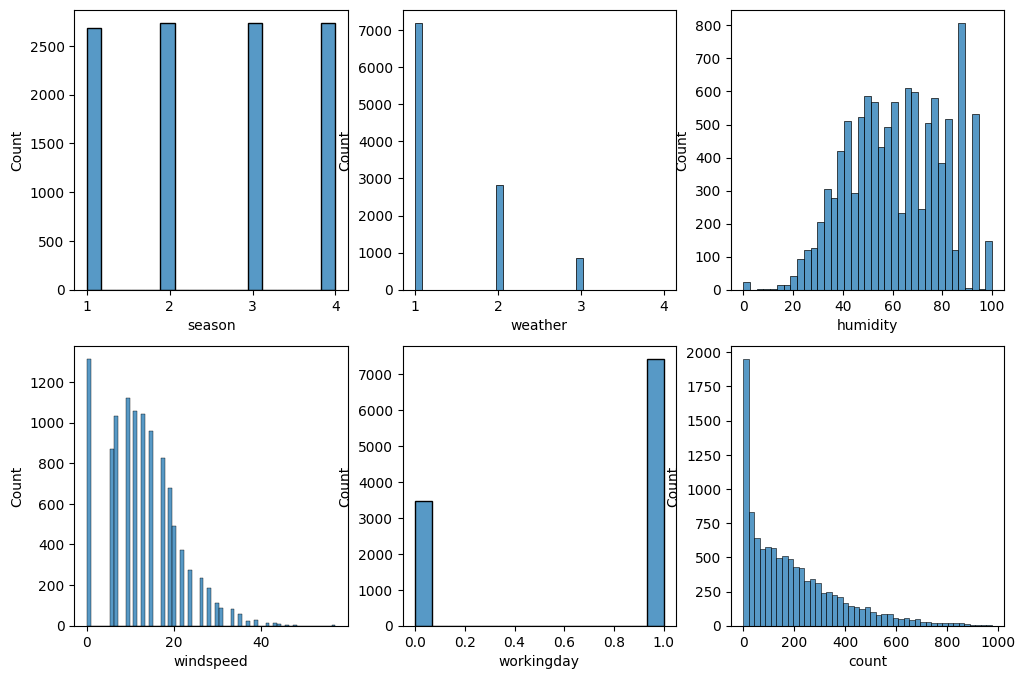

In [ ]:
cols = [ 'season', 'weather', 'humidity', 'windspeed','workingday','count']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
index = 0
for row in range(2):
  for col in range(3):
    sns.histplot(yulu_df[cols[index]], ax=axis[row, col])
    index += 1
plt.show()

Insights

Weather and Count somewhat looks like Log Normal
Distribution

Season has an uniform distribution and humidity has normal distribution

Windspeed follows the binomial distribution



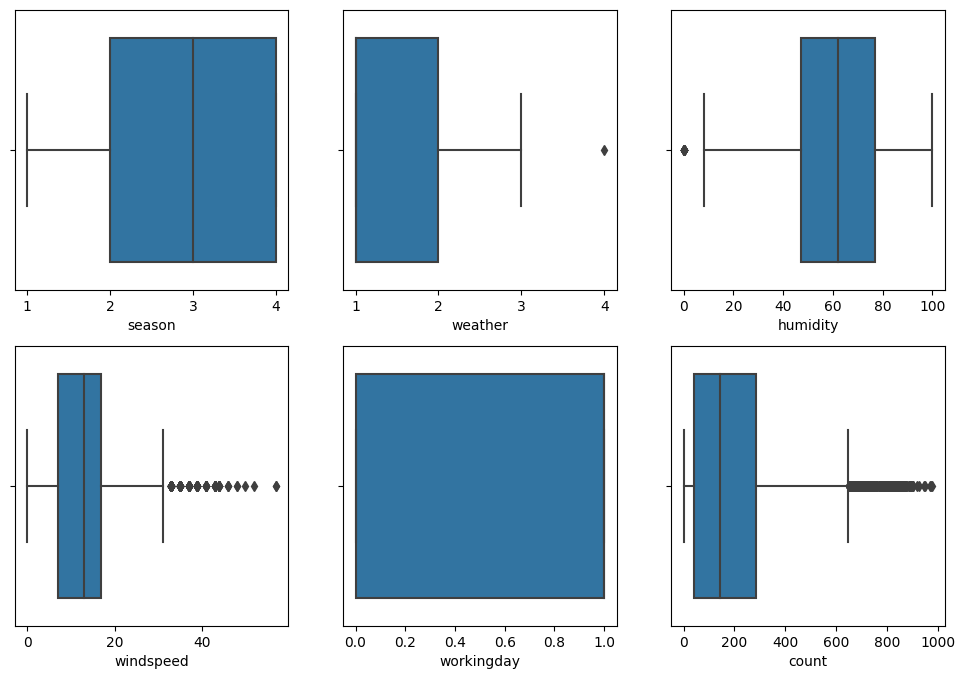

In [ ]:
# To check the outliers - boxplots!!
cols = [ 'season', 'weather', 'humidity', 'windspeed','workingday','count']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
index = 0
for row in range(2):
  for col in range(3):
    sns.boxplot(x=yulu_df[cols[index]], ax=axis[row, col])
    index += 1
plt.show()

Looks like humidity, windspeed and count have outliers in the data.

#**Bivarate Analysis**


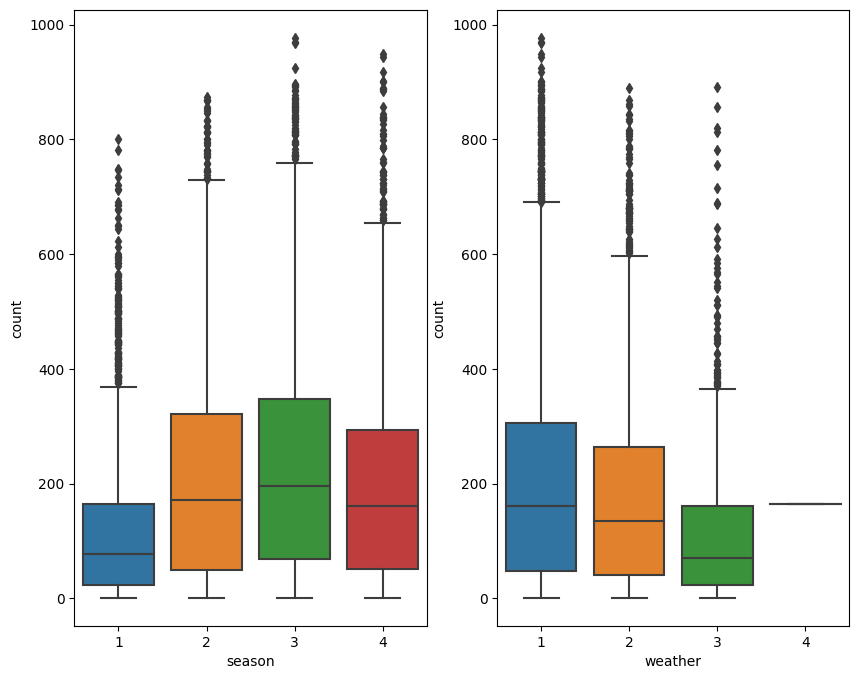

In [ ]:
cols =['season', 'weather']
fig, axis = plt.subplots( 1,2,figsize=(10, 8))

sns.boxplot(data=yulu_df, x=cols[0], y='count',ax=axis[0])
sns.boxplot(data=yulu_df, x=cols[1], y='count',ax=axis[1])

plt.show()

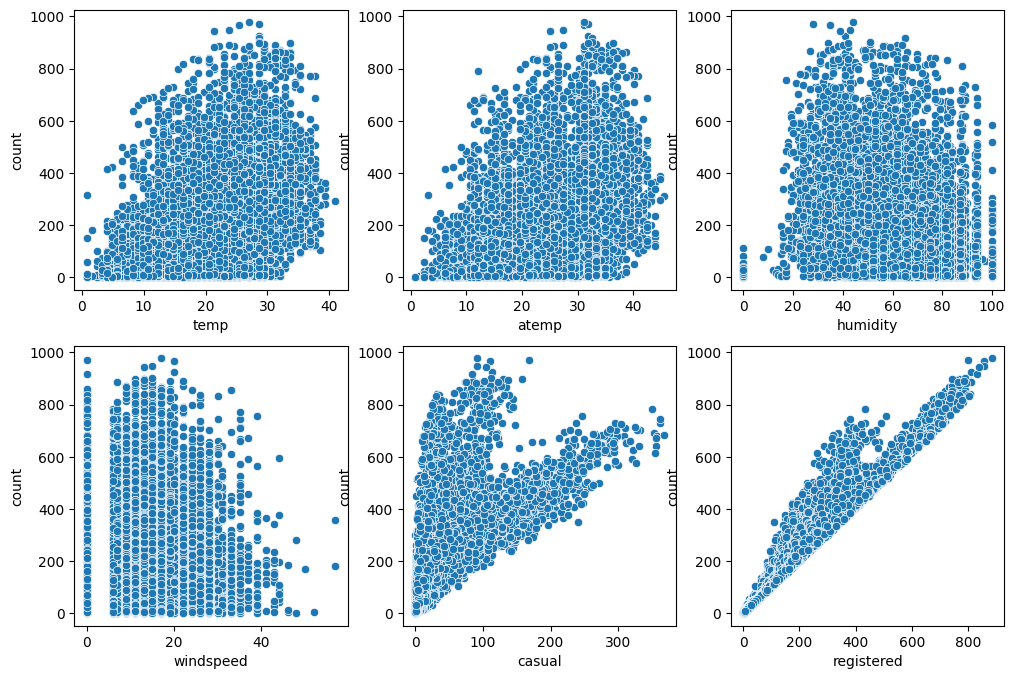

In [ ]:
cols =['temp', 'atemp', 'humidity', 'windspeed','casual','registered']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
index = 0
for row in range(2):
  for col in range(3):
    sns.scatterplot(data=yulu_df, x=cols[index], y='count',
    ax=axis[row, col])
    index += 1
plt.show()

Insights

In summer and fall seasons more bikes are rented as compared to other seasons.
Whenever its a holiday more bikes are rented.

It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.

# **Hypothesis Testing**

**Chi Square Test**
: To conclude whether an association exists between weather and seasons

**Null Hypothesis (H0)**: Weather is independent of the season

**Alternate Hypothesis (H1)**: Weather is not independent of the season

**Significance level (alpha):** 0.05





In [ ]:
from scipy.stats import chi2_contingency
contigency_table = pd.crosstab(yulu_df['season'], yulu_df['weather'])
print("Observed values:")
contigency_table


Observed values:


weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [ ]:
observed_vals = [[1759,1801,1930,1702],[715,708,604,807],[211,224,199,225],[1,0,0,0]]

chi_stat,p_value,dof,expected_freq=chi2_contingency(observed_vals)
print("chi_stat : ",chi_stat)
print("p_value : ",p_value)
print("dof : ",dof)
print("expected_freq : ",expected_freq)
alpha = 0.05
if p_value<alpha:
 print("Interpretation : Weather is not independent of the season ")
else:
 print("Interpretation : Weather is independent of the season")

chi_stat :  49.15865559689363
p_value :  1.5499250736864862e-07
dof :  9
expected_freq :  [[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]
Interpretation : Weather is not independent of the season 


Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that Weather is dependent on the season.

Two - Sample T-Test to check if Working Day has an effect on the number of electric
cycles rented




**Null Hypothesis**: Working day has no effect on the number of cycles being rented.

**Alternate Hypothesis**: Working day has effect on the number of cycles being
rented.

**Significance level** (alpha): 0.05
We will use the 2-Sample T-Test to test the hypothess defined above

In [ ]:
from scipy.stats import ttest_ind

not_working= yulu_df[yulu_df['workingday']==0]['count'].values
working = yulu_df[yulu_df['workingday']==1]['count'].values
ttest_ind(a=not_working, b=working, equal_var=True)

TtestResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348, df=10884.0)

Since pvalue is greater than 0.05 so we cannot reject the Null hypothesis. We don't have the sufficient evidence to say that working day has effect on the number of
cycles being rented.

**ANOVA TEST**

**Null Hypothesis**: Number of cycles rented is similar in different weather and season.

**Alternate Hypothesis**: Number of cycles rented is not similar in different weather and season.

**Significance level** (alpha): 0.05

In [ ]:
from scipy.stats import f,f_oneway,kruskal,ttest_ind,levene
from statsmodels.graphics.gofplots import qqplot

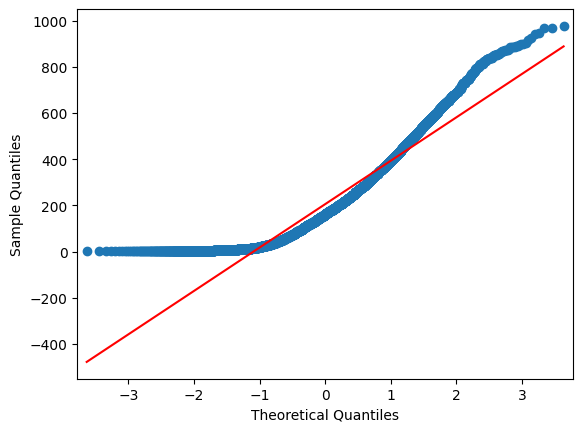

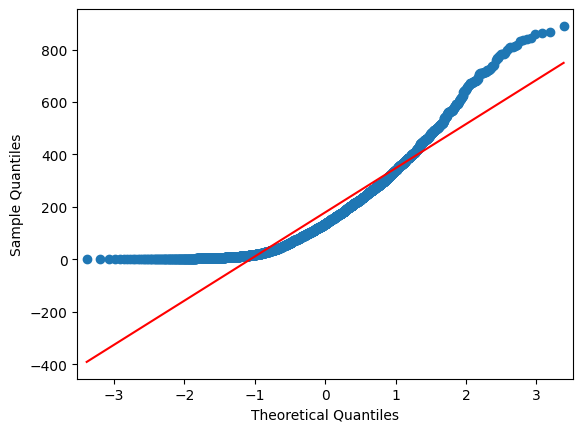

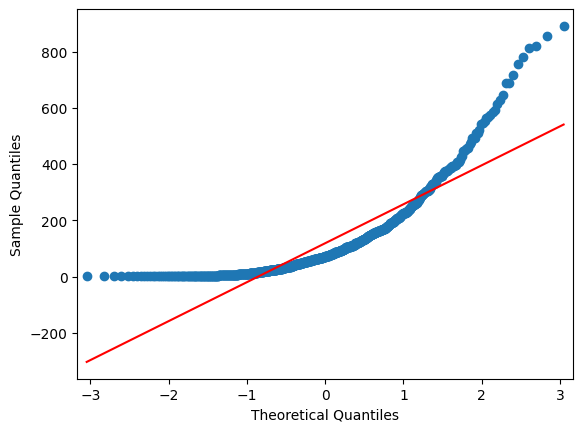

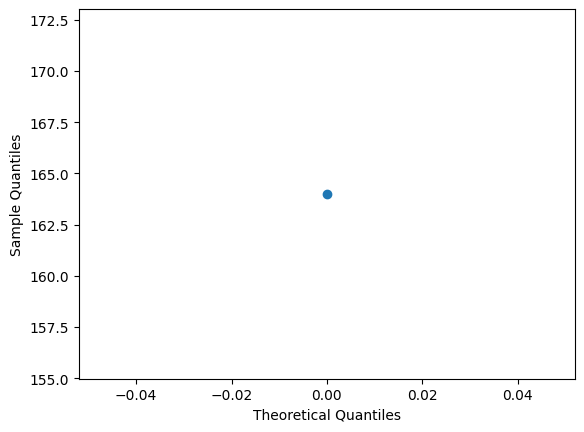

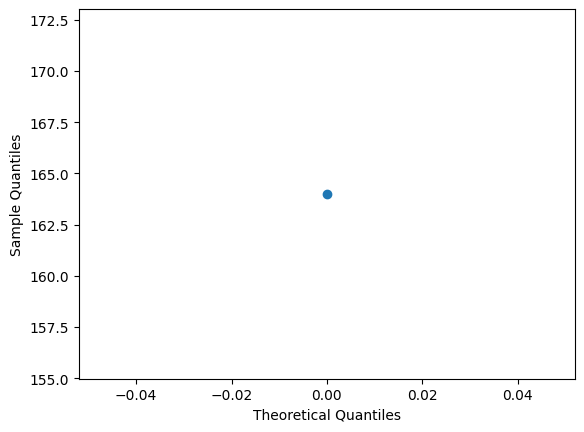

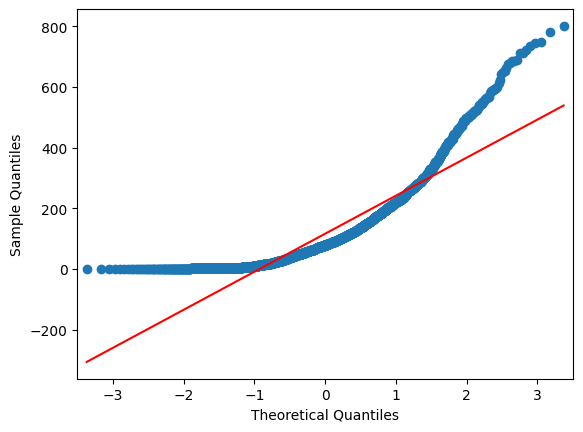

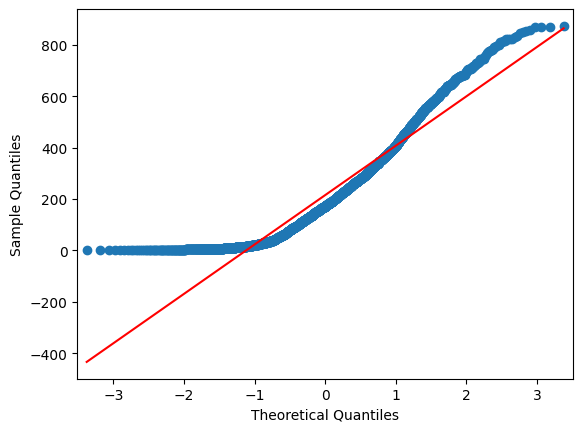

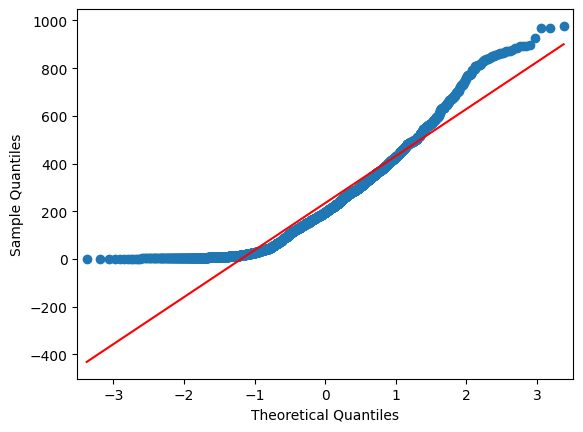

In [ ]:
gp1 = yulu_df[yulu_df['weather']==1]['count'].values
gp2 = yulu_df[yulu_df['weather']==2]['count'].values
gp3 = yulu_df[yulu_df['weather']==3]['count'].values
gp4 = yulu_df[yulu_df['weather']==4]['count'].values

gp5 = yulu_df[yulu_df['season']==1]['count'].values
gp6 = yulu_df[yulu_df['season']==2]['count'].values
gp7 = yulu_df[yulu_df['season']==3]['count'].values
gp8 = yulu_df[yulu_df['season']==4]['count'].values

groups =[gp1,gp2,gp3,gp4,gp4,gp5,gp6,gp7,gp8]
index = 0
for row in range(4):
  for col in range(2):
    qqplot(groups[index], line="s")
    index += 1
plt.show()

As per above graphs,not all of them are not following Gaussian distribution

# Equal variance: Levene's Test

In [ ]:
levene_stat, p_value = levene(gp1,gp2,gp3,gp4,gp5,gp6,gp7,gp8)
print(p_value)
if p_value < 0.05:
  print("Reject the Null hypothesis.Variances are not equal")
else:
  print("Fail to Reject the Null hypothesis.Variances are equal")

3.463531888897594e-148
Reject the Null hypothesis.Variances are not equal



As per QQ plot and Levene's Test, We cannot perform ANOVA Test.




Assumptions of **ANOVA fail**, so using **Kruskal test**


In [ ]:
kruskal_stat, p_value = kruskal(gp1,gp2,gp3,gp4,gp5,gp6,gp7,gp8)
print("p_value===",p_value)
if p_value<0.05:
  print("Since p-value is less than 0.05, we reject the null hypothesis")

p_value=== 4.614440933900297e-191
Since p-value is less than 0.05, we reject the null hypothesis


**Insights**

In summer and fall seasons more bikes are rented as compared to other seasons

It is also clear from the workingday also that whenever day is holiday or weekend,slightly more bikes were rented.

Whenever there is rain, thunderstorm, snow or fog, there were less bikes were
rented.

Whenever the temperature is less than 10, number of bikes rented is less.

Whenever the windspeed is greater than 35, number of bikes rented is less.

**Recommendations**

In summer and fall seasons the company should have more bikes in stock to be
rented. Because the demand in these seasons is higher as compared to other
seasons.

With a significance level of 0.05, workingday has no effect on the number of bikes being rented.
.
Whenever temperature is less, company should have less bikes.

Whenever the windspeed is greater than 35 or in thunderstorms, company should
have less bikes in stock to be rented.